In [8]:
import glob
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import pandas as pd
import codecs
import pickle
import zlib

['captcha-data/input/input19.txt', 'captcha-data/input/input18.txt', 'captcha-data/input/input24.txt', 'captcha-data/input/input23.txt', 'captcha-data/input/input22.txt', 'captcha-data/input/input08.txt', 'captcha-data/input/input20.txt', 'captcha-data/input/input21.txt', 'captcha-data/input/input09.txt', 'captcha-data/input/input10.txt', 'captcha-data/input/input04.txt', 'captcha-data/input/input05.txt', 'captcha-data/input/input11.txt', 'captcha-data/input/input07.txt', 'captcha-data/input/input13.txt', 'captcha-data/input/input12.txt', 'captcha-data/input/input06.txt', 'captcha-data/input/input02.txt', 'captcha-data/input/input16.txt', 'captcha-data/input/input17.txt', 'captcha-data/input/input03.txt', 'captcha-data/input/input15.txt', 'captcha-data/input/input01.txt', 'captcha-data/input/input00.txt', 'captcha-data/input/input14.txt']
captcha-data/input/input19.txt (30, 60, 3)
['5I8VE']
captcha-data/input/input18.txt (30, 60, 3)
['OAH0V']
captcha-data/input/input24.txt (30, 60, 3)


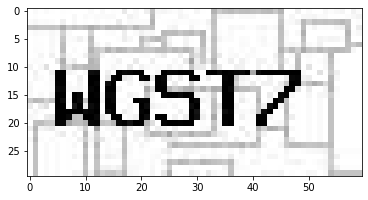

In [9]:
files = glob.glob('captcha-data/input' + '/*.txt')
print(files)
images = []
outputs = []
for file in files:
    f = open(file,'r')
    pixels = f.readline().split()
    rows,cols = int(pixels[0]),int(pixels[1])
    image = np.zeros((rows,cols,3),dtype=int)
    print(file,image.shape)
    for r in range(rows):
        pixels = f.readline().split()
        for c in range(cols):
            image[r,c] = [int(c) for c in pixels[c].split(',')]
    images.append(image)
    f.close()
    file= file.replace('input','output')
    f = open(file,'r')
    output = f.readline().split()
    print(output)
    outputs.append(output)
    f.close()
    plt.imshow(image)

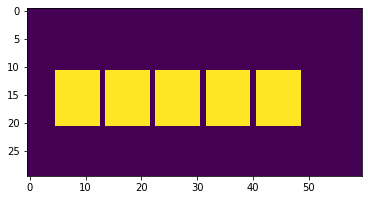

In [10]:
tmp = np.zeros((rows,cols),dtype=int)
for r in range(rows):
    for c in range(cols):
        pix = [v[r,c] for v in images]
        tmp[r,c] = np.var(pix) >300
plt.imshow(tmp)   
#df = pd.DataFrame(tmp)
#df.to_csv('tmp.csv')

In [11]:
train = dict()
startr = 11
endr = 21
startc = 5
numrange = 9
chars = []
i =0
for image in images:
    label = outputs[i][0]
    #plt.imshow(image)
    for c in range(5):
        char = image[startr:endr,(startc + numrange*c):(startc + numrange + numrange*c)]
        charTrue = label[c]
        #plt.figure()
        #plt.imshow(char)
        if not charTrue in train:
            train[charTrue] = []
        train[charTrue].append(char)
    i+=1

In [12]:
X =[]
y= []
for k in train.keys():
    X.append(train[k][0].flatten())
    y.append(k)
X = np.array(X)
y = np.array(y)


In [13]:
xlib = zlib.compress(X.tobytes())
xlib


b'x\x9c\xed\xddG\xcf\xf5U\x15\xc6a\x04E\xc4\x86\x05\x908\xf5#;\'1Q\x83\x15T\x14\x15}\x8eb\xaf\x80\n\xd1D\x08\xa0 \x16\xec\x14\xfb\xc0\xa9\x97\xc9/\xb9w\x9e\xc9{O\xd6\xe4d\x9f\xfd\xdfe\xf5\xb5\xf6M75\xbc\x13\xf4\r\xa0\xc2[@\x85\xcf\x82\xfe\x1b\xb4\xe2o\xa0\x7f\x02\xd5\xff\x8a\xfe\x11\xf4\tP\xfd\xef\xcd\xa0o\x07\xd5w\x89j\xfe/\x82\xea\xf7_\x05\xd5:T\xbc\x06*\xbc\x1e\xf4\x1d\xa0\x7f\x05\xfd\x02\xe8\xea\x1cj\x7f5~]\x07\xe1[\xa0u\x7f\xbf\x03\xfa2\xe8\xe7A\xaf@\xbf\x04Z\xf1/\xd0\xe7A\xff\x01\xaa\xf5\xf9\x1a\xa8~\xff\n\xe8\x1bA\xef\x04\xd5\xfco\x03\x154\xcf\x87@_\x05\xad\xf7\xa2\x9e\x7f\xd1\xfa\xbd:\xb7_\x04\x15n\x07\xfd\x1c\xe8oA\x1f\x06\x95\xbc\x10$\x17*4\xcf\xef\x81~\x1d\xf4\xef\xa0+\xe8\xfc\x08\xd2gt\x9e\xb5\x0e\xe2\'\x7f\x00\xad\xf7B\xfb\xa8q~\nZ\xef\x91\xf8\xb6~/\xbd\xe5]\xa0\xc2j\x9e:o\x1aG\xbf\x17\xff\xaf\xa8z\xd7g@\x9f\x04\x95>P\xcfa\xbdG\xff\x04\xd5|\xbe\x0fZ\xe7\xf9g\xd0\xbf\x80\xbe\tT\x90\xbe\xaa\xf3\xf6C\xd0z\xde\xea\xf9\x7f\x1d\xa8\xa0q\xc4\xc7\x1e\x04\xad\xfb\xf5\x02\xa8~\x7f\x

In [14]:
yout = zlib.compress(y.tobytes())
yout

b'x\x9c\r\xc3[\x16BP\x00\x00\xc0\xbb$\xa1\xe4S\x91GJ\xf2(\xf6\xbf\x103\xe7\xcc9\x84\xd0zu\xb5r\xb0\xb01r\xf1\xe1\xcf\xde\xbfwsO\xbe-\x1d\x9d\xdc\xcd|y\xb1\xb63\xf1f\xec\xd7\xd4\x8f\x9b\xb3O\x0f\xd9\xa2\t\xed'